In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Part 1 - Exploratory data analysis

### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [101]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [102]:
df_log = pd.read_json('logins.json')
df_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [103]:
# Aggregates login counts based on 15 min. intervals
df_log.set_index('login_time', inplace=True)
df_log['Login Counts'] = 1
df_15m = df_log.resample('15T').sum()
df_15m.head()

,Login Counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [104]:
# Data description & visualization
df_15m.describe()

,Login Counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


<AxesSubplot:xlabel='login_time'>

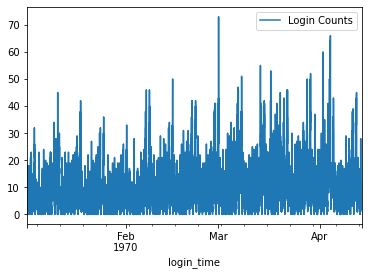

In [105]:
# Login count visualization over time
df_15m.plot()

The highest number of logins in a 15 min window was suring March while there are constant fluctuations of the count across all of the time period.

Text(0.5, 1.0, 'Count Distribution of Login Counts')

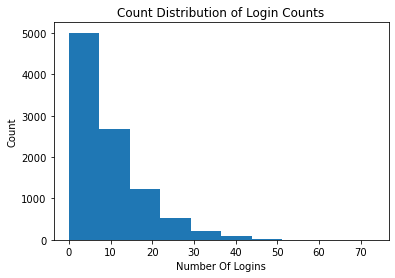

In [106]:
# Login count distribution
plt.hist(df_15m['Login Counts'])
plt.xlabel("Number Of Logins")
plt.ylabel("Count")
plt.title('Count Distribution of Login Counts')

The majority of the counts are in the 0-20 range.

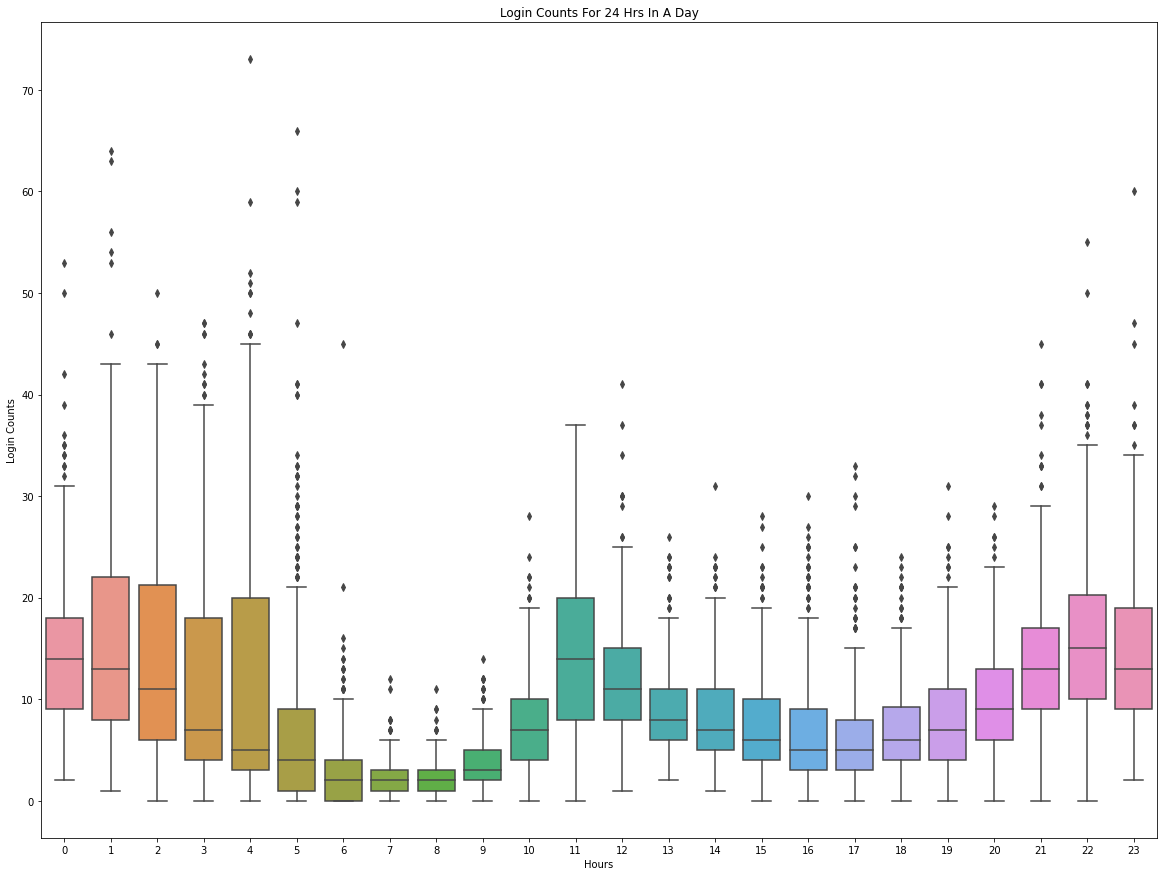

In [107]:
#### Examines the daily cycles 

# Resets index to extract hours and create column
df_15m.reset_index(inplace=True)
df_15m['Hours'] = df_15m['login_time'].dt.hour

plt.figure(figsize=(20,15))
sns.boxplot(x='Hours', y='Login Counts', data = df_15m);
plt.title('Login Counts For 24 Hrs In A Day');

The daily cycle of counts seems to follow the pattern of a decrease of a gradual decrease of counts from 12 am to 8 am, followed by an increase in count from 8 am to 11 am, a gradual decrease from 11 am to 5 pm, and an increase from 5 pm to 10 pm, a decrease from 10 to 11 pm, and lastly a increase from 11 pm to 12 am. 

# Part 2 - Experiment and metrics design

### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 
### However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose the number of trips as the measure of success for the experiment. An increase in the number of trips would indicate many driver partners willingness to cross between cities, thus achieving the goal.

### Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:


### 2a) How you will implement the experiment?

I would implement the experiment by informing at the start of the current month the people of both cities that starting next month, there will be toll cost reimbursements for drivers of non passenger trips. I would collect data for the current month and the next month and compare the number of trips with passengers.

### 2b) What statistical test(s) you will conduct to verify the significance of the observation

I would perform hypothesis testing, specifically a t-test to compare the number of passenger trips and compare the p value to see if there was statistical significance between the group from the current month and the next month when the toll reimbursements are enacted.

### 2c) How you would interpret the results and provide recommendations to the city operations team along with any caveats.

If there is a statistically significant change in the number of passengers trips between the two months, then the experiment was a success. Else, it wasn't a success and the Ultimate managers of city operations need to try something different.

# Part 3 - Predictive modeling

### Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
### We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

### Data Description:
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

### 1) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [108]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [109]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [113]:
# Missing values for 'phone' can be filled with N/A
df['phone'] = df['phone'].fillna('N/A')
# Missing values for 'average_rating_by_driver' and 'average_rating_of_driver' can be filled with the average values
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
# Convert date columns ('signup_date' & 'last_trip_date') to datetime objects
df['last_trip_date'] = pd.to_datetime(df.last_trip_date, format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df.signup_date, format='%Y-%m-%d')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [118]:
# Check the date period in which users need to be "active" (took a trip) to be considered retained
df['last_trip_date'].describe()

<ipython-input-118-59888c2b9332>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

Assuming that data collection stopped at the latest 'last_trip_date' date at July 1, 2014, a user would be considered retained if they took a trip within 30 days of that time. So a user  is retained if they took a trip within June 1, 2014 and July 1, 2014.

In [126]:
# Gets June 1, 2014 time stamp as datetime object
from datetime import datetime
start = "2014-06-01 00:00:00"
print(type(datetime.fromisoformat(start)))

<class 'datetime.datetime'>


In [127]:
# Determines what fractions of the observed users were retained
df['Retained'] = df.last_trip_date.apply(lambda x: 1 if x >= datetime.fromisoformat(start) else 0)
retained_percent = df['Retained'].sum()/len(df)
retained_percent

0.37608

37.61% of users are retained users

### Checks the numerical & boolean columns to see what  features are good for predicting retained status 

<AxesSubplot:>

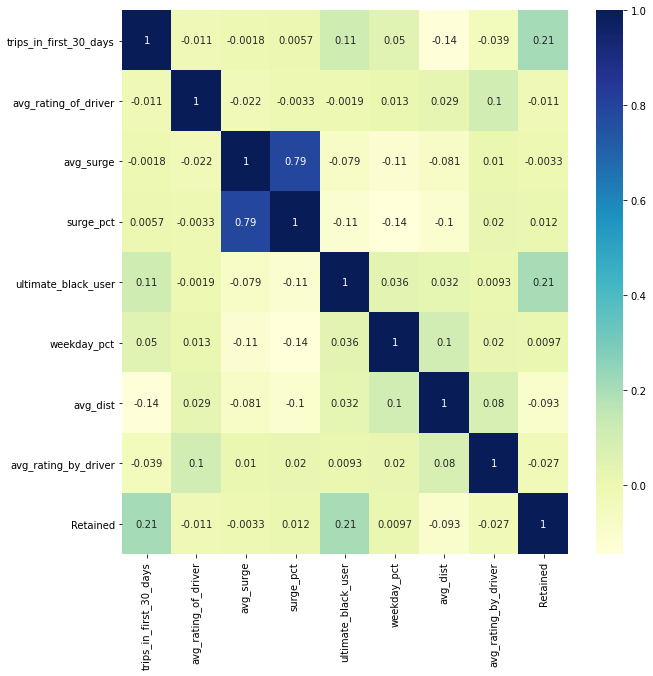

In [134]:
# Print the correlation heatmap to examine which variables seem to have a correlation with the retained status
plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

The two strongest numerical & boolean variables correlated with retained status are 'trips_in_the_first_30_days' and 'ultimate_black_user' at a low 0.21. Every other variable is either negatively or insignificantly positively correlated with retained status.

### Checks the categorical columns to see what features are good for predicting retained status 

In [140]:
# Checks the different items within each of the categorical variables
print(df['phone'].value_counts(), '\n')
print(df['city'].value_counts(), '\n')

iPhone     34582
Android    15022
N/A          396
Name: phone, dtype: int64 

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64 



phone
Android    0.209426
N/A        0.335859
iPhone     0.448933
Name: Retained, dtype: float64


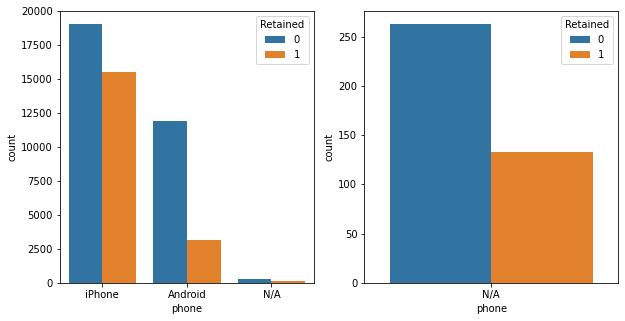

In [176]:
# Plots bar plot of categorical variable 'phone' in relation to 'Retained' status to see correlation
print(df.groupby(df.phone)['Retained'].mean())
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
sns.countplot(x='phone', data=df, hue='Retained', ax = ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(x='phone', data=df[df.phone == 'N/A'], hue='Retained', ax = ax2);

The data shows that more retained users had a phone than did not, 44.9% of iphone users were retained users, 33.6% of no phone users were retained users, and 20.1% of android users were retained users.

city
Astapor           0.255715
King's Landing    0.628134
Winterfell        0.351945
Name: Retained, dtype: float64


<AxesSubplot:xlabel='city', ylabel='count'>

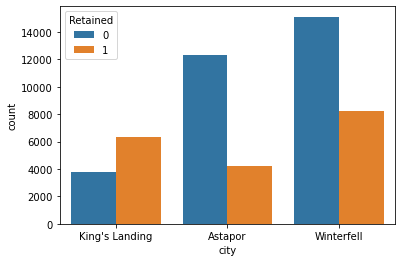

In [177]:
# Plots bar plot of categorical variable 'city' in relation to 'Retained' status to see correlation
print(df.groupby(df.city)['Retained'].mean())
sns.countplot(x='city', data=df, hue='Retained')

King's landing had the highest retained users at 62.8%, followed by Winterfall at 35.2%, and Astapor at 25.6%.

### 2) Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [223]:
# Creates X and y
X = pd.get_dummies(df.drop('Retained', axis=1))
X = X.drop(['signup_date', 'last_trip_date'], axis=1)
y = df['Retained']

In [224]:
# Test train splits data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

In [225]:
X_test

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_N/A,phone_iPhone
28456,0,5.0,1.00,0.0,False,100.0,1.11,5.0,0,0,1,0,0,1
11203,3,4.1,1.09,25.0,False,37.5,5.74,4.9,1,0,0,0,0,1
39136,5,4.6,1.00,0.0,True,84.6,10.47,4.5,0,0,1,0,0,1
31183,3,5.0,1.00,0.0,True,66.7,5.32,5.0,0,1,0,1,0,0
29901,0,5.0,1.00,0.0,False,0.0,1.55,5.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27961,2,4.5,1.33,33.3,False,33.3,10.26,5.0,1,0,0,1,0,0
6525,1,4.0,1.00,0.0,False,100.0,14.74,5.0,1,0,0,0,0,1
7041,6,4.7,1.13,17.4,False,34.8,2.96,4.7,1,0,0,0,0,1
606,0,5.0,1.00,0.0,True,50.0,1.97,5.0,1,0,0,0,0,1


In [226]:
y_test

28456    0
11203    1
39136    0
31183    0
29901    0
        ..
27961    0
6525     0
7041     1
606      1
25583    0
Name: Retained, Length: 10000, dtype: int64

Logistic Regression Model

In [227]:
# Implements Logistic Regression model
lg = Pipeline([('scaler', StandardScaler()),('lg',LogisticRegression())])
param_grid = {'lg__C': [0.01,0.1,1]}
lg_gs = GridSearchCV(lg, param_grid = param_grid, scoring='accuracy', n_jobs = -1)
lg_gs.fit(X_train, y_train)
lg = lg_gs.best_estimator_
lg

Pipeline(steps=[('scaler', StandardScaler()),
                ('lg', LogisticRegression(C=0.01))])

In [228]:
# Makes predictions
pred_test = lg.predict(X_test)

In [229]:
# Prints classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78      6239
           1       0.65      0.48      0.56      3761

    accuracy                           0.71     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.70      0.71      0.70     10000



Random Forest Model

In [230]:
# Creates Random Forest model
rf = Pipeline([('scaler', StandardScaler()),('rf', RandomForestClassifier())])
param_grid = {'rf__n_estimators': [100,300,500]}
rf_gs = GridSearchCV(rf, param_grid = param_grid, scoring='accuracy',  n_jobs = -1)
rf_gs.fit(X_train, y_train)
rf = rf_gs.best_estimator_
rf

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators=500))])

In [231]:
# Makes predictions
pred_test = rf.predict(X_test)

In [232]:
# Prints classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6239
           1       0.67      0.66      0.67      3761

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



In [233]:
# Prints feature importances to understand what features were important in predicting retained status

feat = {}
for i in range(len(list(X_train.columns))):
    feature = list(X_train.columns)[i]
    imp = rf.named_steps.rf.feature_importances_[i]
    feat.update({feature:imp})
sorted(feat.items(), key=lambda x: x[1], reverse=True)

[('avg_dist', 0.2990883136568288),
 ('weekday_pct', 0.13235291178034628),
 ('avg_rating_by_driver', 0.1116441077732943),
 ('avg_rating_of_driver', 0.08068926386505776),
 ('trips_in_first_30_days', 0.08065558963678442),
 ('surge_pct', 0.07923783106053078),
 ('avg_surge', 0.06696556506008383),
 ("city_King's Landing", 0.047999472583625954),
 ('ultimate_black_user', 0.032002648726911914),
 ('phone_Android', 0.02139626999344771),
 ('phone_iPhone', 0.019137920109843384),
 ('city_Astapor', 0.016206433357294714),
 ('city_Winterfell', 0.0114778154388751),
 ('phone_N/A', 0.001145856957075156)]

### 3)  Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Given the model feature importances, the most important feature indicating retained status is 'avg_dist'. So Ultimate should look to retain users that ride a lot of miles within the first 30 days of signup, as this is indicative of them being retained users during the 6th month. The next most important feature to indicate retained status is 'weekday_pct', so Ultimate should focus on ensuring riders who ride on weekdays are happy with the service so they can remain retained users in the future. The next feature 'avg_rating_by_driver' is also a good indicator of whether a user is retained, so it seems that riders with a higher rating tended to be retained users and thus Ultimate should focus on ensuring good travel experiences for those riders to keep them as retained users. 

Although the modeling feature importances doesn't list 'trips_in_the_first_30_days,' 'ultimate_black_user,' 'city_King's Landing' near the top  of the list, the heatmap printed in EDA showed these features having the highest positive correlations to a users retained status. So I believe incentivizing users to ride more in the first 30 days and be ultimate black users might influence them to become retained users 6 months down the line. Also, users who are in the city 'King's Landing' are more likely to be retained users. Ultimate should understand why this is the case and implement a strategy to the other 2 cities to get more riders there to turn into retained users. 